In [ ]:
#Our entire approach may be prone to data leakage... this is due to the fact that we preprocessed before splitting into train and validdation(test) set.

In [1]:
#This is an advanced regression problem and we would try to analyze it step by step.
#lets start by importing the neccessary magical tools
import numpy as np #manipulating matrices(linear algebra)

In [2]:
from xgboost import XGBRegressor

In [3]:
import pandas as pd#for data manipulation

In [4]:
import matplotlib.pyplot as plt# we need this for Exploratory data analysis(EDA)

In [5]:
import seaborn as sns#for beautiful EDA

In [147]:
from sklearn.ensemble import StackingRegressor

In [135]:
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

In [7]:
from sklearn.preprocessing import MinMaxScaler#to scale our numerical features(between -1 and 1)

In [8]:
from sklearn.feature_extraction import FeatureHasher#to encode our categorical features

In [9]:
from sklearn.model_selection import train_test_split#to split our training dataset

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn.model_selection import KFold

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
from sklearn.linear_model import Ridge 

In [15]:
from sklearn.linear_model import Lasso

In [16]:
from sklearn.pipeline import Pipeline, make_pipeline

In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
from sklearn.model_selection import GridSearchCV

In [21]:
train_data=pd.read_csv('train.csv')

In [23]:
test_data=pd.read_csv('test.csv')

In [24]:
train_data.shape, test_data.shape#to get the shape of the train and test data

((1460, 81), (1459, 80))

In [25]:
train_data.head()#getting a view at our data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [27]:
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [28]:
test_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [29]:
train_data.describe()#lets get a statistical description of our dataset

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [30]:
train_data.info()#a better look into ur data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [31]:
#lets see a personal description for our target variable(SalePrice)
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [32]:
#due to the high number of columns, we cant get all columns(features) in a view. lets try to list them all out
train_data.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [33]:
#the features are much... its neccessary we look deeper into them(we can see numeric and categorical types)
#we can do this by splitting into numeric and categorical since we need to treat them differently
numeric_features=train_data.select_dtypes(include=[np.number]) #beautiful piece of code
#a list of our numerical features.
numeric_list=numeric_features.columns.tolist()
numeric_list

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [34]:
#lets see our categorical variables
categorica_features=train_data.select_dtypes(include=['object'])
categorical_list=categorica_features.columns.tolist()
categorical_list

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [35]:
#lets see how many numerical feautres and non numeric(categorical) variables that we have.
len(numeric_list), len(categorical_list)

(38, 43)

In [36]:
#lets see a personal description for our target variable(SalePrice)
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Dsitribution of SalesPrice')

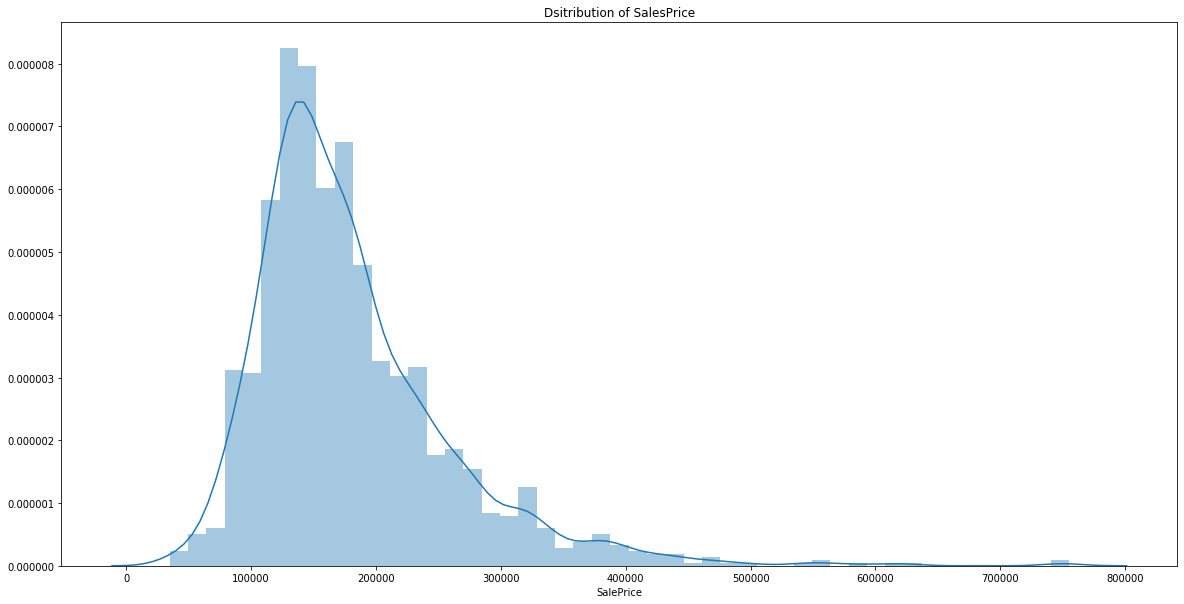

In [37]:
#its quite difficult to understand this description without usinng some nice displays.
#lets see the skewness of the SalePrice(skewness==how much its deviating from the normal distribution)
f,ax=plt.subplots(figsize = (20, 10))
sns.distplot(train_data['SalePrice'])
plt.title('Dsitribution of SalesPrice')

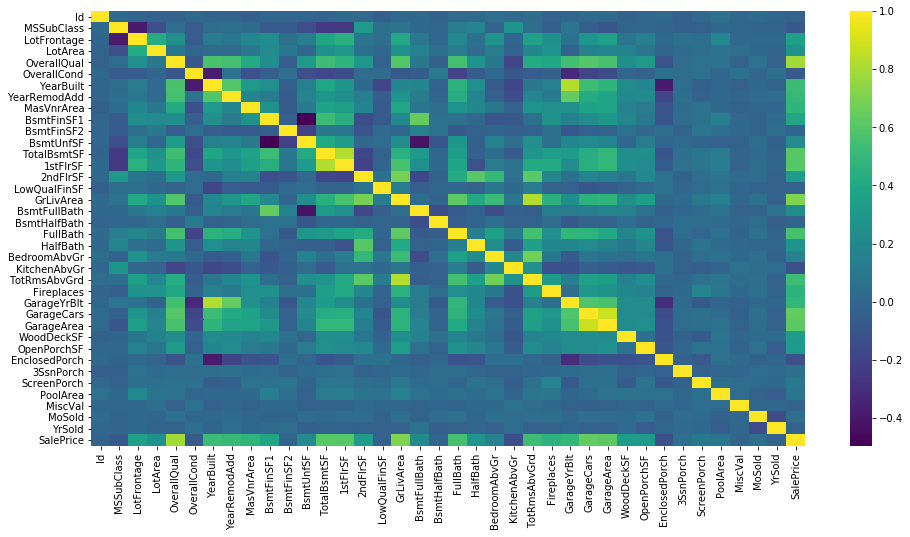

In [38]:
#looks right-skewed...we will get back to it
#lets see the features with high corelation with the SalePrice...Take a look at this display
f, ax = plt.subplots(figsize = (16, 8))
correlation_matrix = sns.heatmap(train_data.corr(), cmap = 'viridis')

In [39]:
#since some of the features are categorical, it maay be difficult t plot them against the Saleprice.
#we would try to see the relationship between the numerical columns and the SalePrice.
#since the numerical features contains the SalePrice, it makes sense to remove it before plotting
numeric_list.remove('SalePrice')

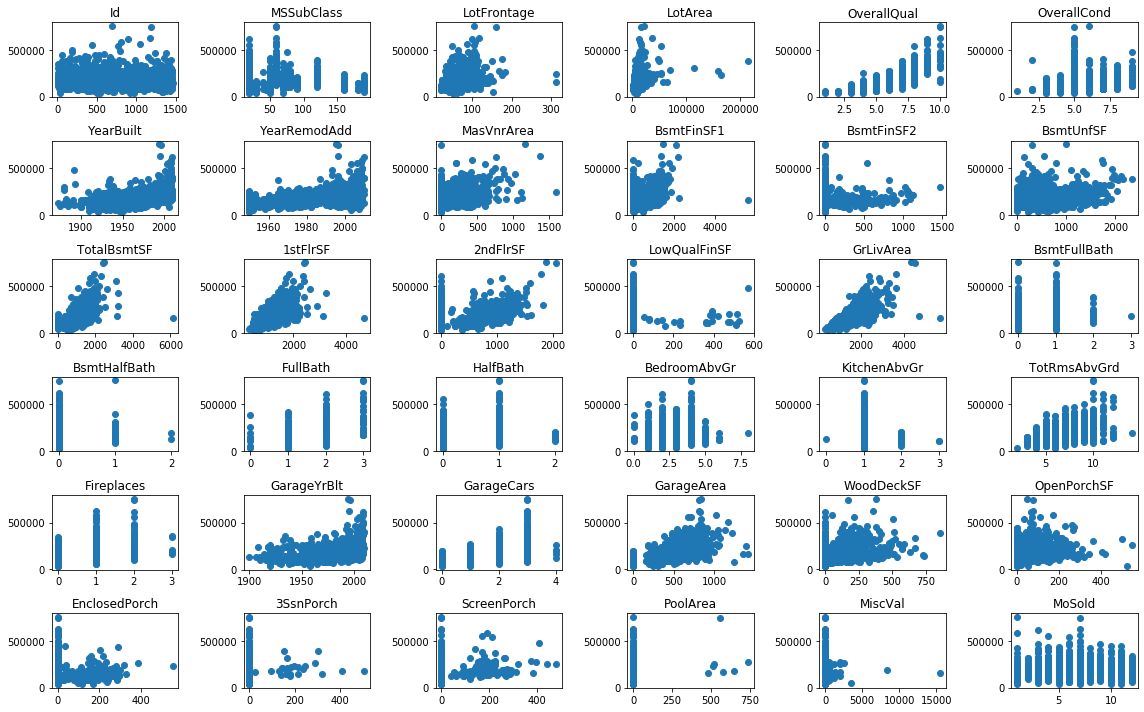

In [40]:
#now lets plot.
plt.figure(figsize = (16,10))
for i in range(36): #its 36 for numerical features because we have dropped the SalePrice
    plt.subplot(6,6,i+1)
    plt.scatter(train_data[numeric_list[i]], train_data['SalePrice'])#features on x-axis, SalePrice on y-axis
    plt.title(numeric_list[i])
plt.tight_layout()

In [41]:
#due to missing values, some of the plots make little sense... although, OverallQual seems to be showing good correlation
#lets see the numerical value of the correlation of these numerical features with the SalePrice

corr_train_data = train_data.corr()
print("Top 30 Numeric Columns which are highly correlated to SalePrice are:")
print(corr_train_data.nlargest(31, 'SalePrice')['SalePrice'])


Top 30 Numeric Columns which are highly correlated to SalePrice are:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Name: SalePrice, dtype: float64


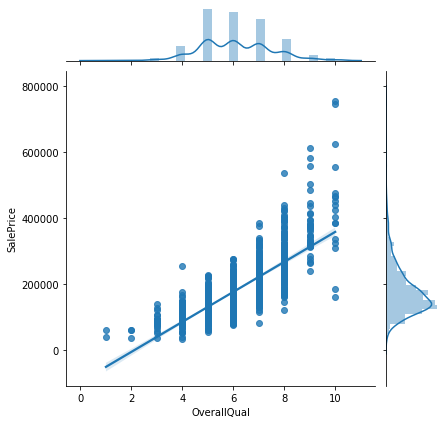

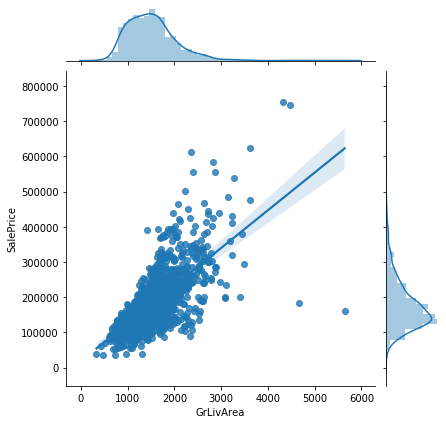

In [42]:
#we can use the above results to understand our plots above
#lets get a clearer picture of the correlation of these features above with the SalePrice starting with the highest
#we can also deal with outliers from these plots
sns.jointplot(train_data['OverallQual'], train_data['SalePrice'], kind = 'reg')
sns.jointplot(train_data['GrLivArea'], train_data['SalePrice'], kind = 'reg')

In [43]:
#OverallQual seems to be in good shape with little or no outliers. but GrLiveArea seems to be with some outliers
#looking at the above figure, GrLiveArea of 4000 and above seems to be difficult for the scatter plot to fit, lets drop them
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<250000)].index).reset_index(drop=True)

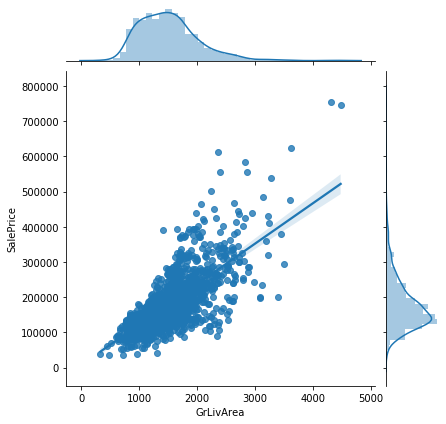

In [44]:
#lets check our corellation once more
sns.jointplot(train_data['GrLivArea'], train_data['SalePrice'], kind = 'reg')

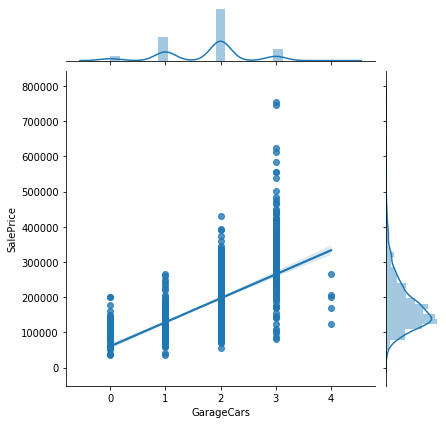

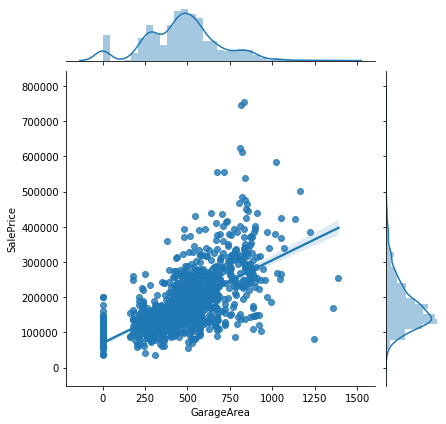

In [45]:
#seems like those outliers have been removed
#lets check out GarageCars and GarageAreas and their correlation with our target price
sns.jointplot(train_data['GarageCars'], train_data['SalePrice'], kind = 'reg')
sns.jointplot(train_data['GarageArea'], train_data['SalePrice'], kind = 'reg')

In [46]:
#for the first plot, its logical to drop GarageCars >=4 with SalePrice<300000. they are acting like outliers
train_data = train_data.drop(train_data[(train_data['GarageCars']>=4) & (train_data['SalePrice']<300000)].index).reset_index(drop=True)
#and for the second plot, we may want to consider dropping GarageArea >=1200 with SalePrice<250000
train_data = train_data.drop(train_data[(train_data['GarageArea']>=1200) & (train_data['SalePrice']<300000)].index).reset_index(drop=True)                             

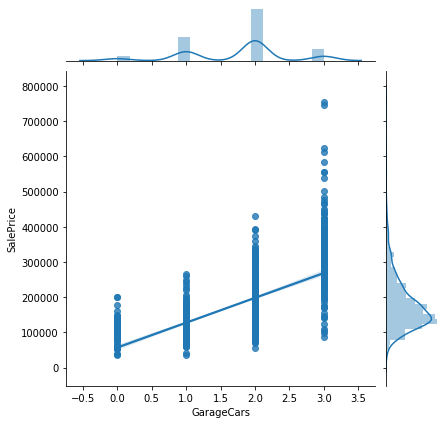

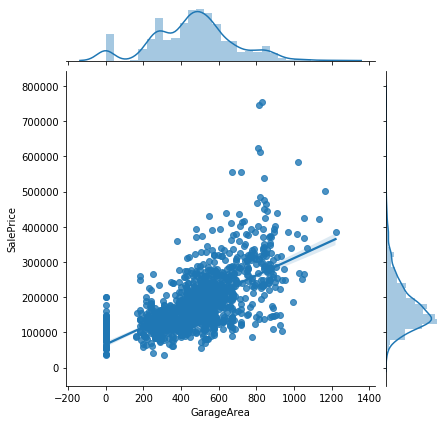

In [47]:
#lets see how they look now after dropping the outliers
sns.jointplot(train_data['GarageCars'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['GarageArea'], train_data['SalePrice'], kind = 'reg')

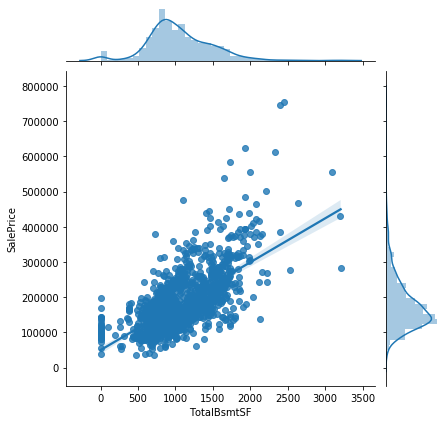

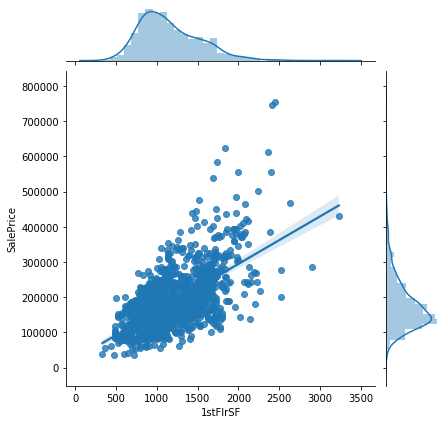

In [48]:
#this looks muuch more better...lets visualize again...
sns.jointplot(train_data['TotalBsmtSF'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['1stFlrSF'], train_data['SalePrice'], kind = 'reg')

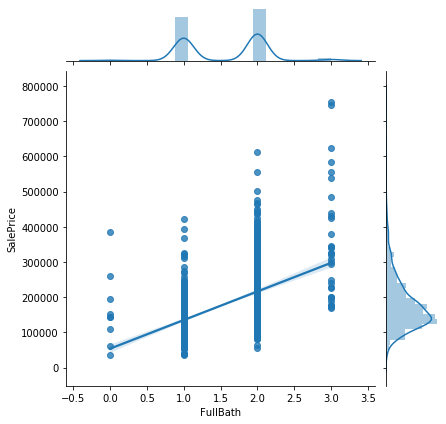

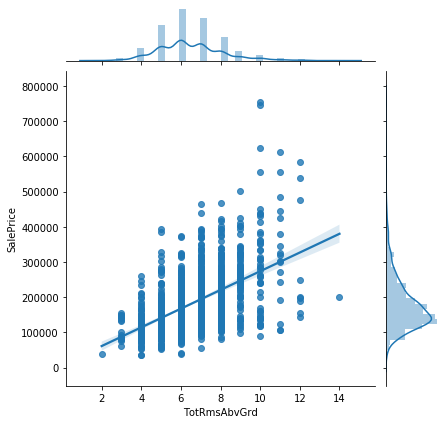

In [49]:
#this seems ok
#lets see others
sns.jointplot(train_data['FullBath'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['TotRmsAbvGrd'], train_data['SalePrice'], kind = 'reg')

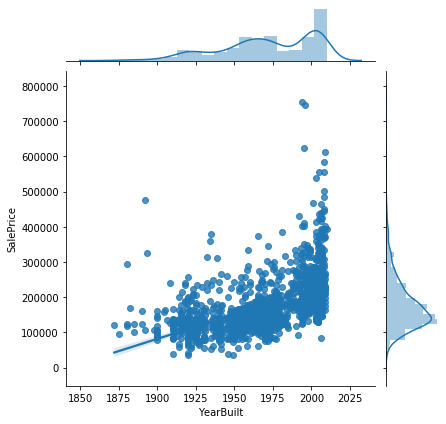

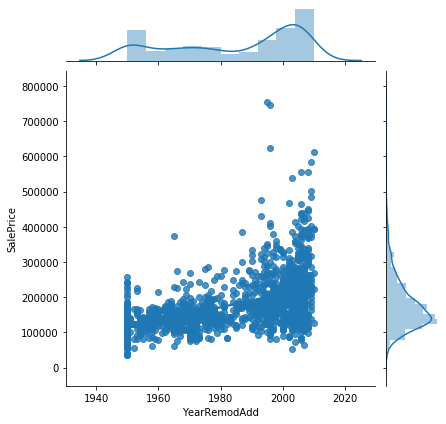

In [50]:
#the data point at 14 may seem an outlier, but its not. theres no point to reference it.
sns.jointplot(train_data['YearBuilt'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['YearRemodAdd'], train_data['SalePrice'], kind = 'reg')

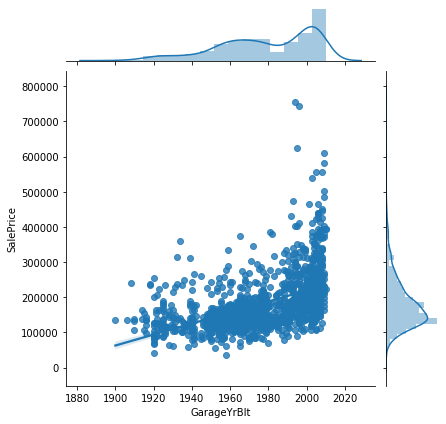

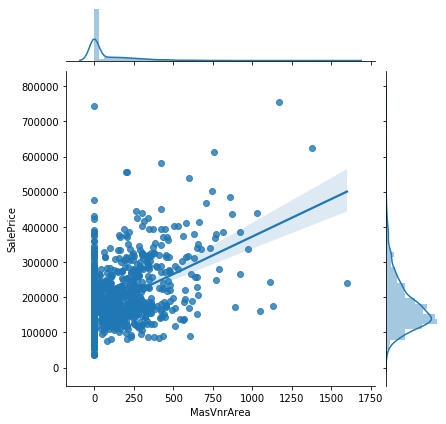

In [51]:
#they seem not to have data points that do not fit the pattern
sns.jointplot(train_data['GarageYrBlt'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['MasVnrArea'], train_data['SalePrice'], kind = 'reg')

In [52]:
#there seems to be some outlier in the second plot, lets take care of them.
train_data = train_data.drop(train_data[(train_data['MasVnrArea']>=0) & (train_data['SalePrice']>700000)].index).reset_index(drop=True) 

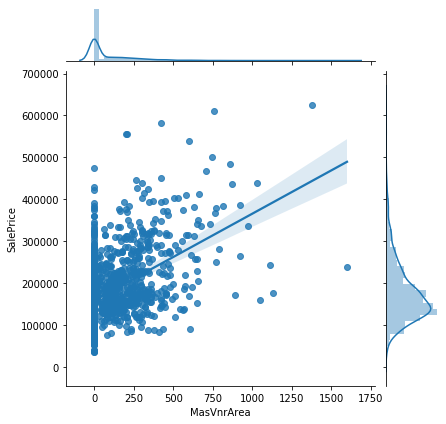

In [53]:
sns.jointplot(train_data['MasVnrArea'], train_data['SalePrice'], kind = 'reg')

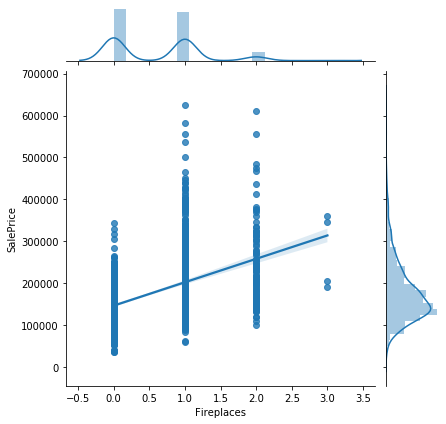

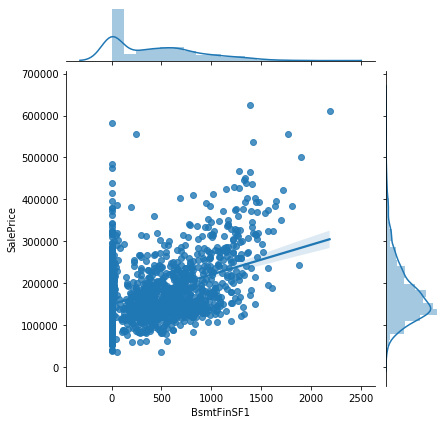

In [54]:
#seems like we have taken care of them
sns.jointplot(train_data['Fireplaces'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['BsmtFinSF1'], train_data['SalePrice'], kind = 'reg')

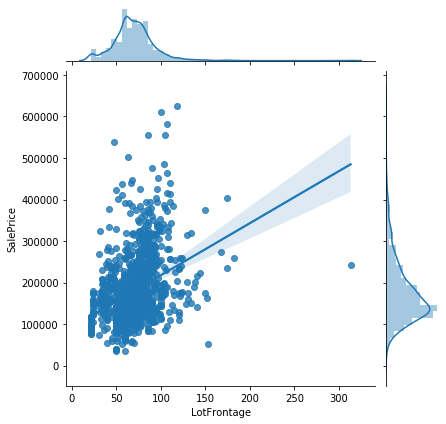

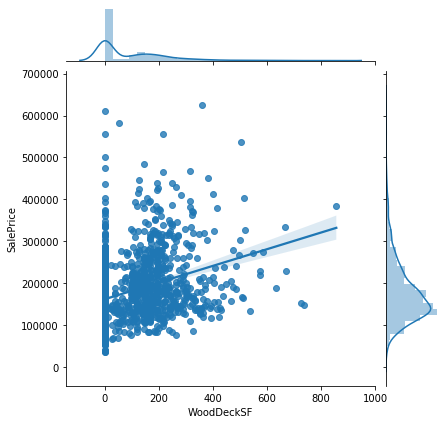

In [55]:
#there seems to be no outliers in the above plot
sns.jointplot(train_data['LotFrontage'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['WoodDeckSF'], train_data['SalePrice'], kind = 'reg')

In [56]:
#there seems to be an outlier at the first plot
train_data = train_data.drop(train_data[(train_data['LotFrontage']>300) & (train_data['SalePrice']<300000)].index).reset_index(drop=True)

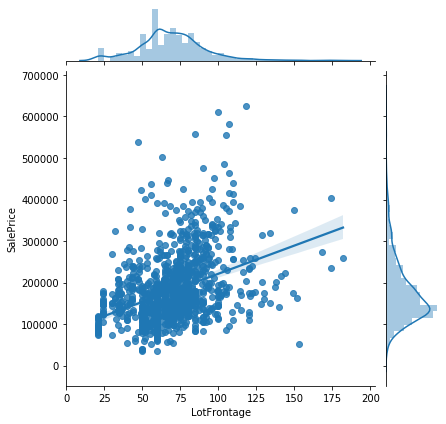

In [57]:
#lets see how it looks now...
sns.jointplot(train_data['LotFrontage'], train_data['SalePrice'], kind = 'reg')

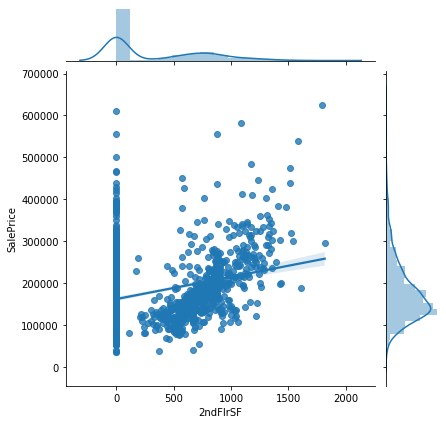

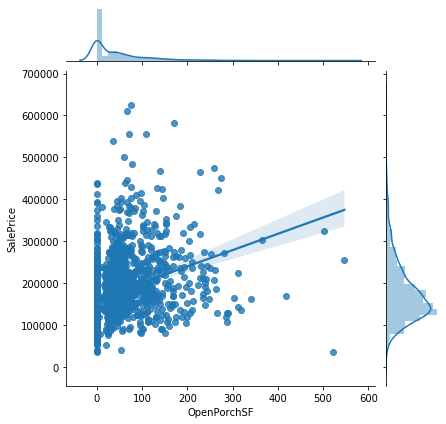

In [58]:
#now we can see the generalization much more better by removing the outlier
sns.jointplot(train_data['2ndFlrSF'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['OpenPorchSF'], train_data['SalePrice'], kind = 'reg')

In [59]:
train_data = train_data.drop(train_data[(train_data['2ndFlrSF']>1500) & (train_data['SalePrice']<600000)].index).reset_index(drop=True)
train_data = train_data.drop(train_data[(train_data['OpenPorchSF']>500) & (train_data['SalePrice']<100000)].index).reset_index(drop=True)

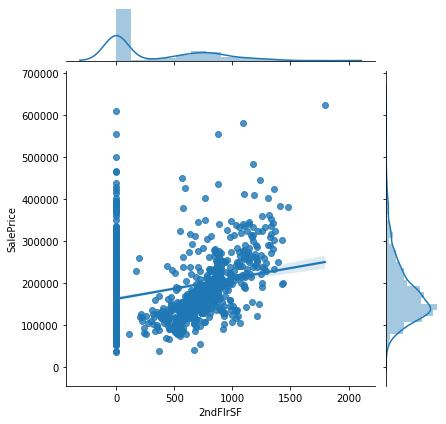

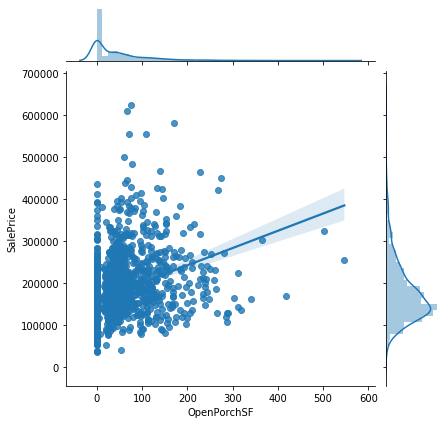

In [60]:
sns.jointplot(train_data['2ndFlrSF'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['OpenPorchSF'], train_data['SalePrice'], kind = 'reg')

In [61]:
train_data = train_data.drop(train_data[(train_data['2ndFlrSF']>1500) & (train_data['SalePrice']>600000)].index).reset_index(drop=True)
#there stil seems to be an outlier with the 2ndFlrsf plot... lrts try to deal with it

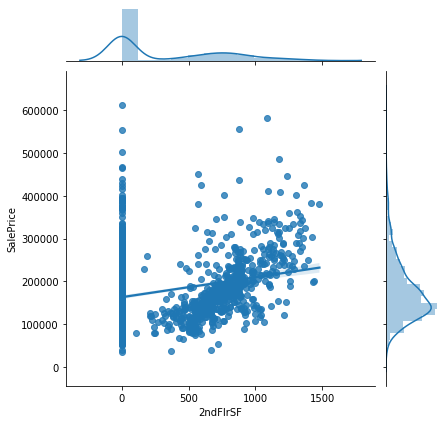

In [62]:
sns.jointplot(train_data['2ndFlrSF'], train_data['SalePrice'], kind = 'reg')

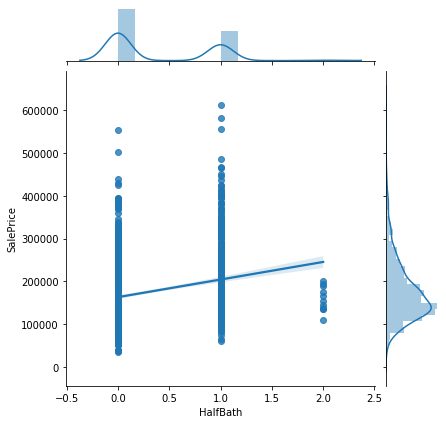

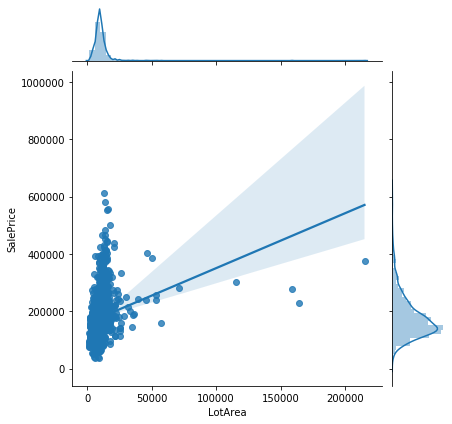

In [63]:
sns.jointplot(train_data['HalfBath'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['LotArea'], train_data['SalePrice'], kind = 'reg')

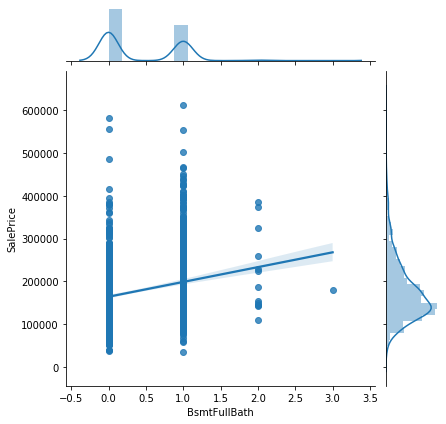

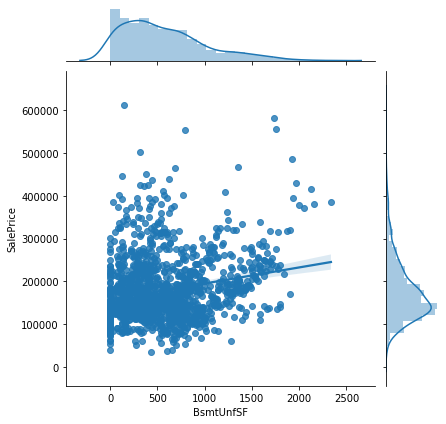

In [64]:
#the large lotarea are acting like outliers... but they are not
#the rest of the features seem to have negligible correlation with the SalePrice, but lets see some more visualizations
sns.jointplot(train_data['BsmtFullBath'], train_data['SalePrice'], kind = 'reg')#reg stands for regression
sns.jointplot(train_data['BsmtUnfSF'], train_data['SalePrice'], kind = 'reg')

In [65]:
#recall earlier that we looked at the distribution of the SalePrice.
#since it was right skewed, its logical to apply some kind of transformation, i will be using ln(SalePrice)
train_data['SalePrice'] = np.log(train_data['SalePrice'])

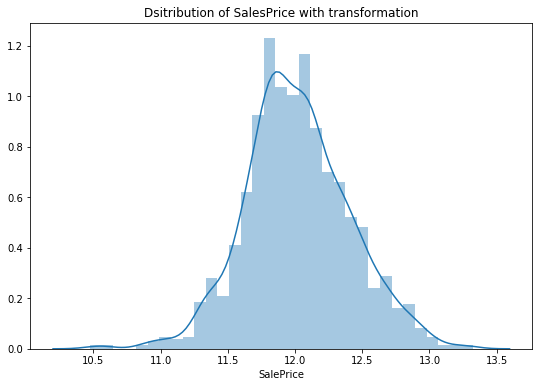

In [66]:
plt.figure(figsize = (9,6))
sns.distplot(train_data['SalePrice'])
plt.title('Dsitribution of SalesPrice with transformation')
plt.show()

In [67]:
#the plot above looks much more better...we can applyy the np.expm1(SalePrice) to inverse our final prediction
#lets store the target feature somewhere... we will need to drop it inorder to move forward with EDA
target_feature = train_data['SalePrice']#storing
train_data.drop(['SalePrice'], axis = 1, inplace = True)#dropping

In [68]:
#now, we want to concatenate the test and train data together. but first, we must first drop the Id columns from both of them
train_data.drop(['Id'], axis = 1, inplace = True)
test_data.drop(['Id'], axis = 1, inplace = True)

In [69]:
#now, lets concatenate...
full_data = pd.concat([train_data, test_data], axis = 0)
print('Shape of full_data will be:',full_data.shape)#axis=0 because we are adding to the rows

Shape of full_data will be: (2898, 79)


In [70]:
full_data.head()#number of rows reduced, this are some effects of removing outliers 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [71]:
#now lets evaluate the best possible way to fill in our missing values
#we can should check the amount of missing values in the fulldata
print('Total sum of missing values in the full data:',full_data.isnull().values.sum())

Total sum of missing values in the full data: 13876


In [72]:
#thats quite a lot... now lets try to fill them up. but lets check column wise missing value
print('Sum of missing values in each column:',full_data.isnull().sum())

Sum of missing values in each column: MSSubClass         0
MSZoning           4
LotFrontage      484
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64


In [73]:
#we cant get a clearer picture, lets try checking for missing values in ascending order
missing_data=full_data.isnull().sum()

In [74]:
missing_full_data = missing_data[missing_data > 0].sort_values(ascending = False)#getting the missing columns(with values greater than zero in ascending order of how much missing values they have
missing_full_data

PoolQC          2890
MiscFeature     2794
Alley           2701
Fence           2331
FireplaceQu     1414
LotFrontage      484
GarageFinish     158
GarageYrBlt      158
GarageQual       158
GarageCond       158
GarageType       156
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

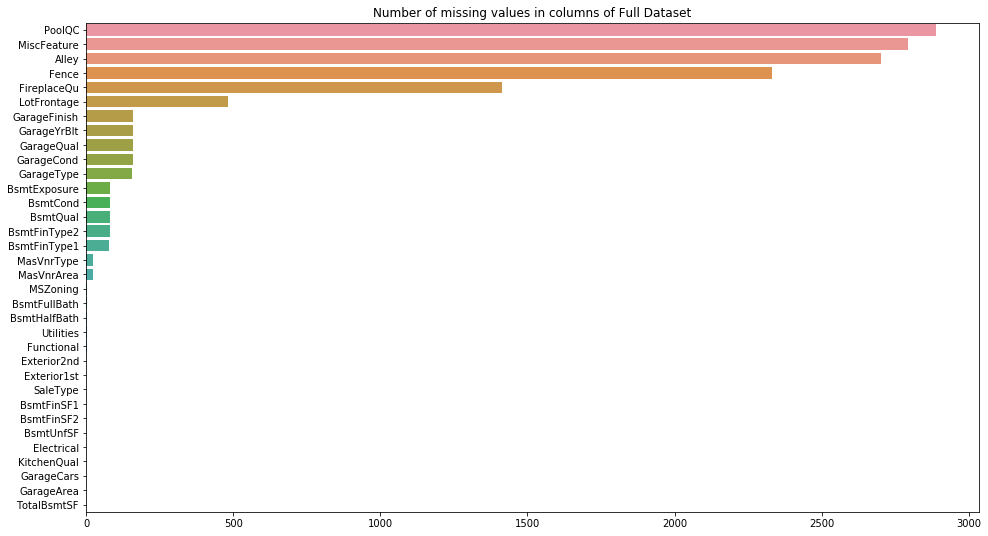

In [75]:
plt.figure(figsize = (16,9))
sns.barplot(y = missing_full_data.index, x = missing_full_data)
plt.title('Number of missing values in columns of Full Dataset')
plt.show()

In [76]:
#lets see the missing features for both numeric and categoricaal variables
#first for categorical features
missing_cat=full_data[categorical_list].isnull().sum()#we can use the categorical variable we defined above(make sure its a list) because objects are the same for both test and train
missing_cat
#note that we didnt include ascending order in defining our variable.

MSZoning            4
Street              0
Alley            2701
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1414
GarageType        156
GarageFinish      158
GarageQual        158
GarageCond        158
PavedDrive          0
PoolQC           2890
Fence            2331
MiscFeature      2794
SaleType            1
SaleCondition       0
dtype: int64

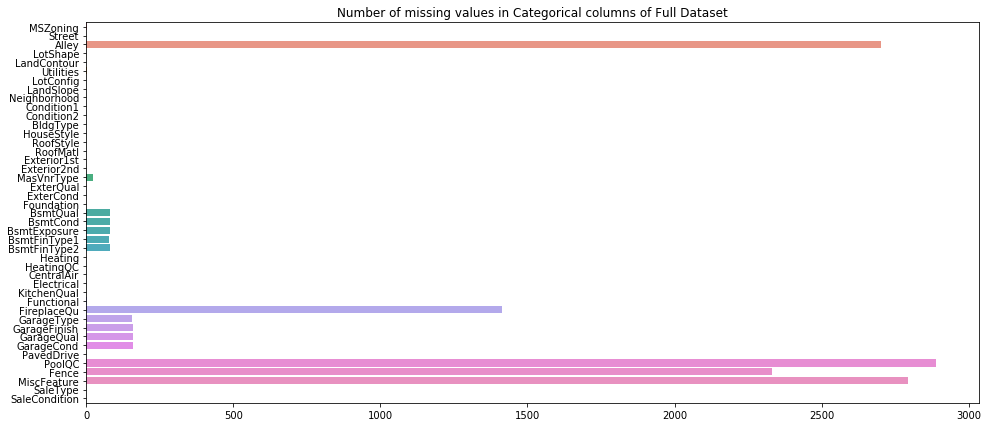

In [77]:
#lets see them on a plot
plt.figure(figsize = (16,7))
sns.barplot(y = missing_cat.index, x = missing_cat)
plt.title('Number of missing values in Categorical columns of Full Dataset')
plt.show()

In [78]:
numeric_features.drop(['Id', 'SalePrice'], axis=1, inplace=True)#numeric features still contain Id and SalePrice features

In [79]:
missing_numeric = full_data[numeric_features.columns.tolist()].isnull().sum()#shows the sum of all missing value for each feature
missing_asce_numeric = missing_numeric[missing_numeric > 0].sort_values(ascending = False)#shows the missing values whose sum is greater than zero
print('Numerical Columns with missing values:',len(missing_asce_numeric))
print(missing_asce_numeric)

Numerical Columns with missing values: 11
LotFrontage     484
GarageYrBlt     158
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64


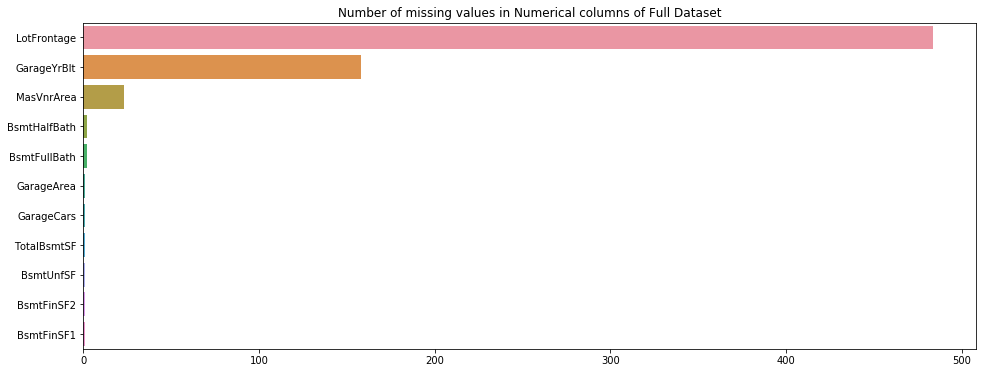

In [80]:
#now lets see the graph
plt.figure(figsize = (16,6))
sns.barplot(y = missing_asce_numeric.index, x = missing_asce_numeric)
plt.title('Number of missing values in Numerical columns of Full Dataset')
plt.show()

In [81]:
#now its time to start filling up our missing vvalues, first, lets get a description of  our data
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2898 non-null   int64  
 1   MSZoning       2894 non-null   object 
 2   LotFrontage    2414 non-null   float64
 3   LotArea        2898 non-null   int64  
 4   Street         2898 non-null   object 
 5   Alley          197 non-null    object 
 6   LotShape       2898 non-null   object 
 7   LandContour    2898 non-null   object 
 8   Utilities      2896 non-null   object 
 9   LotConfig      2898 non-null   object 
 10  LandSlope      2898 non-null   object 
 11  Neighborhood   2898 non-null   object 
 12  Condition1     2898 non-null   object 
 13  Condition2     2898 non-null   object 
 14  BldgType       2898 non-null   object 
 15  HouseStyle     2898 non-null   object 
 16  OverallQual    2898 non-null   int64  
 17  OverallCond    2898 non-null   int64  
 18  YearBuil

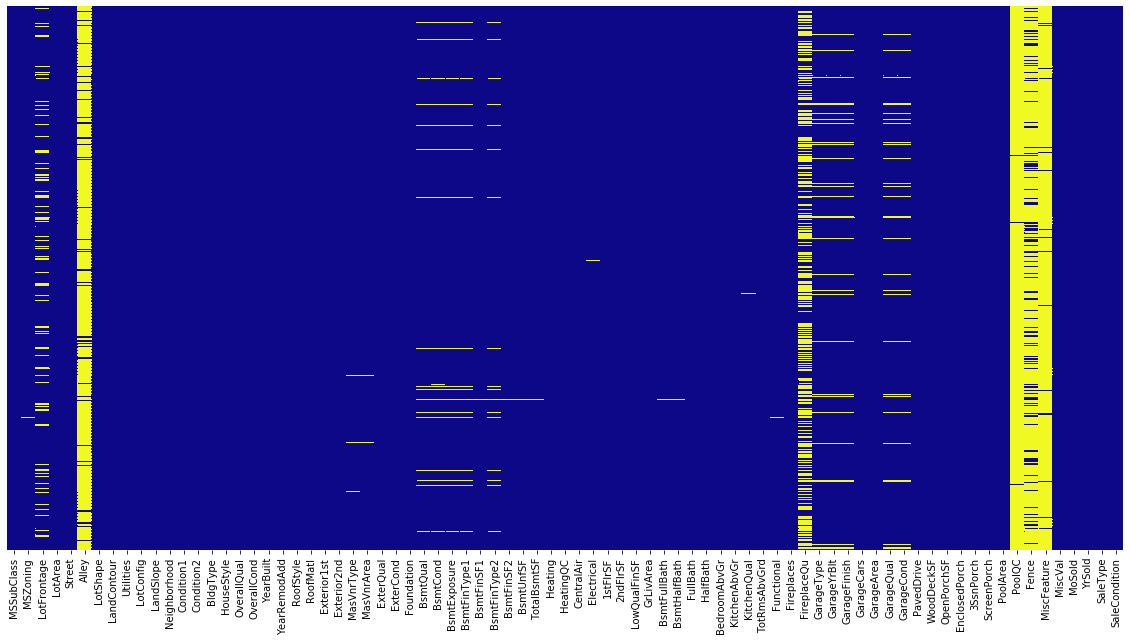

In [82]:
#lets ssee a much clearer plot for this
f, ax = plt.subplots(figsize = (20, 10))

sns.heatmap(full_data.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')

In [83]:
#we can clealy see the features with very amount of missing values from the figure above
#NOW ITS TIME FOR THE MAIN WORK, IMPUTATION.
#WE WILL START WITH THE CATEGORICAL FEATURES...BE CAREFUL, SOME CATEGORICAL FEATURES ARE STRINGS.
#looking at the data, some features are not available because the house does not have them. PoolQC, PoolArea[not all houses have pools],fences too are included, we will replace these kind of features with none 
#when imputing, check your data very well to ensure you are not filling none for a feature that must have value
none_fill=['Alley','MiscFeature','Fence','PoolQC','FireplaceQu',
           'GarageQual','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtCond','BsmtQual',
           'BsmtFinType2','BsmtFinType1','MasVnrType']

In [84]:
print('The Number of Categorical columns in which are going to be filled with "None":',len(none_fill))
for i in none_fill:
    print()#to space each category in i
    print(full_data[i].value_counts())

The Number of Categorical columns in which are going to be filled with "None": 15

Grvl    120
Pave     77
Name: Alley, dtype: int64

Shed    94
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

MnPrv    328
GdPrv    117
GdWo     110
MnWw      12
Name: Fence, dtype: int64

Ex    3
Gd    3
Fa    2
Name: PoolQC, dtype: int64

Gd    737
TA    586
Fa     74
Po     46
Ex     41
Name: FireplaceQu, dtype: int64

TA    2585
Fa     124
Gd      24
Po       5
Ex       2
Name: GarageQual, dtype: int64

Unf    1224
RFn     807
Fin     709
Name: GarageFinish, dtype: int64

TA    2634
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

Attchd     1714
Detchd      774
BuiltIn     181
Basment      36
2Types       22
CarPort      15
Name: GarageType, dtype: int64

No    1895
Av     416
Gd     268
Mn     237
Name: BsmtExposure, dtype: int64

TA    2589
Gd     120
Fa     102
Po       5
Name: BsmtCond, dtype: int64

TA    1273
Gd    1205
Ex     251
Fa      88
Name: B

In [85]:
#now, lets fill them up
for i in none_fill:
    full_data[i] = full_data[i].fillna('None')

In [86]:
#lets see if the columns or features have been filled
full_data[none_fill].isnull().sum()

Alley           0
MiscFeature     0
Fence           0
PoolQC          0
FireplaceQu     0
GarageQual      0
GarageFinish    0
GarageCond      0
GarageType      0
BsmtExposure    0
BsmtCond        0
BsmtQual        0
BsmtFinType2    0
BsmtFinType1    0
MasVnrType      0
dtype: int64

In [87]:
miss_asce_cat = missing_cat[missing_cat > 0].sort_values(ascending = False)#ascending order of missing categorical features

In [88]:
#now lets deal with the remaining categorical variables
#we can take a set diffference to get the remaining cat. features
cat_left = list(set(miss_asce_cat.index) - set(none_fill)) #set difference between all the cat features and the features we flled with none

In [89]:
print('Categorical columns remaining are:',len(cat_left))
for i in cat_left:
    print()
    print(full_data[i].value_counts())#this should give us all the remaining un filled cat columns

Categorical columns remaining are: 8

WD       2509
New       235
COD        87
ConLD      25
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

AllPub    2895
NoSeWa       1
Name: Utilities, dtype: int64

VinylSd    1010
MetalSd     443
HdBoard     404
Wd Sdng     387
Plywood     269
CmentBd     124
Wd Shng      80
BrkFace      47
Stucco       45
AsbShng      38
Brk Cmn      22
ImStucc      14
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

TA    1485
Gd    1144
Ex     198
Fa      70
Name: KitchenQual, dtype: int64

Typ     2697
Min2      70
Min1      65
Mod       34
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

SBrkr    2651
FuseA     187
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

VinylSd    1021
MetalSd     445
HdBoard     440
Wd Sdng     407
Plywood     220
CemntBd     123
BrkFace      87
WdShing      56
AsbShng      44
Stucco    

In [90]:
#Utilities seems to be the odd one out of the categorical variables, just one of the imput has a different category. studying it carefully, i noticed that it has no effect on the target
#its best we drop it from our categorical features. we will fill the rest with the most frequent(mode)
for i in cat_left:
    if i == 'Utilities':
        full_data.drop([i], axis = 1, inplace = True)
    else:
        full_data[i] = full_data[i].fillna(full_data[i].mode()[0])

In [91]:
#now that we have taken utilities away from our full_data, lets take it away from other subsets of full_data so we dont run into troble
cat_left.remove('Utilities')

In [92]:
categorical_list.remove('Utilities')

In [93]:
full_data[cat_left].isnull().sum()

SaleType       0
Exterior2nd    0
KitchenQual    0
Functional     0
Electrical     0
Exterior1st    0
MSZoning       0
dtype: int64

In [94]:
#now we can handle the numerical features.
#first, lets get a list of the numerical features we will be filling
missing_numer=list(missing_asce_numeric.index)#without index, you will get the sum of missing values 
missing_numer

['LotFrontage',
 'GarageYrBlt',
 'MasVnrArea',
 'BsmtHalfBath',
 'BsmtFullBath',
 'GarageArea',
 'GarageCars',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'BsmtFinSF1']

In [95]:
#LotFrontage deals with street informatiion,it will be logical to fill it up with respect to information from neigboring streets
#we will be filling it with data from Neighborhood feature using groupby. The rest will be filled with zero.
full_data["LotFrontage"] = full_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for i in missing_numer:
    if i != 'LotFrontage':
        full_data[i] = full_data[i].fillna(0)
        
#we are using median because its usually closer to each number, mean couuld also be used.        

In [96]:
full_data[missing_numer].isnull().sum()

LotFrontage     0
GarageYrBlt     0
MasVnrArea      0
BsmtHalfBath    0
BsmtFullBath    0
GarageArea      0
GarageCars      0
TotalBsmtSF     0
BsmtUnfSF       0
BsmtFinSF2      0
BsmtFinSF1      0
dtype: int64

In [97]:
#now we have filled up the missing values in our data.... ITS TIME FOR FEATURE ENGINEERING
full_data.info()#JUST TO CONFIRM

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2898 non-null   int64  
 1   MSZoning       2898 non-null   object 
 2   LotFrontage    2898 non-null   float64
 3   LotArea        2898 non-null   int64  
 4   Street         2898 non-null   object 
 5   Alley          2898 non-null   object 
 6   LotShape       2898 non-null   object 
 7   LandContour    2898 non-null   object 
 8   LotConfig      2898 non-null   object 
 9   LandSlope      2898 non-null   object 
 10  Neighborhood   2898 non-null   object 
 11  Condition1     2898 non-null   object 
 12  Condition2     2898 non-null   object 
 13  BldgType       2898 non-null   object 
 14  HouseStyle     2898 non-null   object 
 15  OverallQual    2898 non-null   int64  
 16  OverallCond    2898 non-null   int64  
 17  YearBuilt      2898 non-null   int64  
 18  YearRemo

In [98]:
#LETS CHECK THE LENGTH OF OUR FEATURES
len(categorical_list), len(numeric_list)

(42, 37)

In [99]:
#i dont think ive dropped the Id feature from the numeric list, we need to do this
numeric_list.remove('Id')

In [100]:
#LETS CHECK THE LENGTH OF OUR FEATURES AGAIN
len(categorical_list), len(numeric_list)

(42, 36)

In [101]:
#LOOKS ALL GOOD
full_data[numeric_list].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [102]:
#lets apply MinMaxScaler on the numeric columns to scale the data(This WILL in a way reduces the scatter of our data)
mm_scaler = MinMaxScaler(feature_range = (-1,1))#i'm using a range of (-1,1) because its a regression problem
full_data[numeric_list] = mm_scaler.fit_transform(full_data[numeric_list]) #Calling fit and transform at once

In [103]:
#lets check it out
full_data[numeric_list].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-0.529412,-0.508380,-0.933160,0.333333,0.00,0.898551,0.766667,-0.7550,-0.647880,-1.0,...,-0.263441,-1.000000,-0.835580,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.818182,0.0
1,-1.000000,-0.340782,-0.922410,0.111111,0.75,0.507246,-0.133333,-1.0000,-0.512219,-1.0,...,-0.381720,-0.581461,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,-0.272727,-0.5
2,-0.529412,-0.474860,-0.906985,0.333333,0.00,0.869565,0.733333,-0.7975,-0.757606,-1.0,...,-0.182796,-1.000000,-0.886792,-1.000000,-1.0,-1.0,-1.0,-1.0,0.454545,0.0
3,-0.411765,-0.564246,-0.922877,0.333333,0.00,-0.376812,-0.333333,-1.0000,-0.892269,-1.0,...,-0.137097,-1.000000,-0.905660,-0.462451,-1.0,-1.0,-1.0,-1.0,-0.818182,-1.0
4,-0.529412,-0.296089,-0.878847,0.555556,0.00,0.855072,0.666667,-0.5625,-0.673317,-1.0,...,0.123656,-0.730337,-0.773585,-1.000000,-1.0,-1.0,-1.0,-1.0,1.000000,0.0


In [104]:
missing_cat=missing_cat.drop('Utilities')#we need to drop utilities from every variable holding it

In [105]:
full_data[categorical_list].head()#we need to drop uitilities from our initial definition of missin_cat

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [106]:
#now lets do some encoding..we are using feature hasher because it reduces the dimensionality. we can try onehot encoding later
#you could perform more than one encoding on yur datasets.just specify the column.
fh = FeatureHasher(n_features = 3, input_type = 'string')#we need to specify input type for new features name
df_category_column = pd.DataFrame()#we are creating a dataframe for categorical features so we can drop the previous dataframe of categorical features

for i in categorical_list: #the (i+'_') will add the extra prefix to the name generated by featurehasher
    df_category_column = pd.concat([pd.DataFrame(fh.fit_transform(full_data[i]).toarray()).add_prefix(i+'_'),df_category_column], axis = 1)

df_category_column.head()#toarray() transforms the list to array wich is acceptable by pandas dataframe

,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleType_0,SaleType_1,SaleType_2,MiscFeature_0,MiscFeature_1,MiscFeature_2,Fence_0,...,LotShape_2,Alley_0,Alley_1,Alley_2,Street_0,Street_1,Street_2,MSZoning_0,MSZoning_1,MSZoning_2
0,0.0,3.0,1.0,0.0,0.0,0.0,-1.0,2.0,-1.0,-1.0,...,-1.0,-1.0,2.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0
1,0.0,3.0,1.0,0.0,0.0,0.0,-1.0,2.0,-1.0,-1.0,...,-1.0,-1.0,2.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0
2,0.0,3.0,1.0,0.0,0.0,0.0,-1.0,2.0,-1.0,-1.0,...,0.0,-1.0,2.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0
3,-1.0,4.0,0.0,0.0,0.0,0.0,-1.0,2.0,-1.0,-1.0,...,0.0,-1.0,2.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0
4,0.0,3.0,1.0,0.0,0.0,0.0,-1.0,2.0,-1.0,-1.0,...,0.0,-1.0,2.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0


In [107]:
#now we have feature hashed the cat columns. we got 126 columns, we can now concat with numerical columns.
#So from above cell WE have converted the categorical column into 3 columns and that 3 columns will be used to signify any value uniquely
#NEXT STEP IS TO CONCATENATE WITH NUMERICAL COLUMNS

full_data = pd.concat([full_data[numeric_list].reset_index(drop = True), df_category_column], axis = 1)

In [108]:
#next step is to split the train and test data. look at this beautiful approach
traindata = full_data[:train_data.shape[0]]#take all the rows and column up to the shape of train_data shape(around 1460)
testdata = full_data[train_data.shape[0]:]#take all the rows and columns from the shape of train_data to the eend

In [109]:
#lets see the shapes
print('Shape of Training set:',traindata.shape)
print('Shape of Test set:',testdata.shape)

Shape of Training set: (1439, 162)
Shape of Test set: (1459, 162)


In [152]:
test_data.shape

(1459, 79)

In [110]:
#lets check to see if there are any object type of data in ouur dataset
for i in traindata.columns:
    if traindata[i].dtype != 'object':
        break
    else:
        print(i)

In [153]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [111]:
#lets split our train data into training and validation set.
X_train, X_test,y_train,y_test=train_test_split(traindata,target_feature, test_size=0.2)

In [112]:
#NOW ITS TIME TO BRING IN OUR MODELS.
#WE WILL BE USING 4 MODELS, RANDOMFORESTREGRESSOR, lasso,Ridge and GradientBoostingRegressor
rdg=Ridge(alpha=0.01).fit(X_train,y_train)


In [113]:
rdg.score(X_train,y_train)

0.9337580450678633

In [114]:
rdg.score(X_test,y_test)#there seems to be overfitting, but we will take care of that when we uae pipeline

0.9124715082349122

In [115]:
#we would use best parameter method later, lets see how other models are fairing
las=Lasso(alpha=0.001).fit(X_train,y_train)

In [116]:
las.score(X_train,y_train)

0.9228328935998593

In [117]:
las.score(X_test,y_test)

0.9116525086577268

In [118]:
rf=RandomForestRegressor(n_estimators=200,max_depth=30,n_jobs=-1,random_state=42).fit(X_train,y_train)

In [119]:
rf.score(X_train,y_train)

0.9835106853666945

In [120]:
rf.score(X_test,y_test)

0.8799546426784306

In [121]:
gbr=GradientBoostingRegressor(random_state=0)

In [122]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [123]:
gbr.score(X_train,y_train)

0.9614512925536924

In [124]:
gbr.score(X_test,y_test)

0.9114721159618078

In [125]:
#NOW ITS TIME TO IMPLEMENT PIPELINES AND GRIDSEARCHCV TP GET THE BEST FROM OUR MODEL. we may include polynomial features later on
parameters={'lasso__alpha':[1e-4, 1e-3, 1e-2, 0.1, 0.05]}
pipe=make_pipeline(RobustScaler(),Lasso())
grid=GridSearchCV(pipe,param_grid=parameters,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
              

In [126]:
print('best cross-validation accuracy:', grid.best_score_)

best cross-validation accuracy: 0.9099987545469521


In [148]:
las_final=Lasso(alpha=0.001)

In [127]:
print('best test score:', grid.score(X_test,y_test))

best test score: 0.9175445679895271


In [129]:
#mean_absolute_error(y_valid, preds)

NameError: name 'y_valid' is not defined

In [130]:
print('best parameters:',grid.best_params_)

best parameters: {'lasso__alpha': 0.001}


In [131]:
#now lets see how Ridge will fair
parameters={'ridge__alpha':[1e-4, 1e-3, 1e-2, 0.1, 1]}
pipe=make_pipeline(RobustScaler(),Ridge())
grid=GridSearchCV(pipe,param_grid=parameters,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
     

In [132]:
print('best cross-validation accuracy:', grid.best_score_)

best cross-validation accuracy: 0.9024332067748659


In [133]:
print('best test score:', grid.score(X_test,y_test))

best test score: 0.9154069011775878


In [134]:
print('best parameters:',grid.best_params_)

best parameters: {'ridge__alpha': 1}


In [283]:
#lets check out random forest
#parameters={'randomforestregressor__n_estimators':[100,300, 500, 1000,1500],
            'randomforestregressor__max_depth':[3,5,7,9,12],
            'randomforestregressor__max_features':['auto', 'sqrt'], 'randomforestregressor__min_samples_leaf':[50, 55, 60]}
#pipe=make_pipeline(RobustScaler(),RandomForestRegressor())
#grid=GridSearchCV(pipe,param_grid=parameters,cv=5)
#grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                        

In [284]:
print('best cross-validation accuracy:', grid.best_score_)

best cross-validation accuracy: 0.7594961977732055


In [285]:
print('best test score:', grid.score(X_test,y_test))#his score is the score that randomforestregressor uses(since we set score to None)

best test score: 0.7782305787810004


In [286]:
print('best parameters:',grid.best_params_)

best parameters: {'randomforestregressor__max_depth': 12, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_leaf': 50, 'randomforestregressor__n_estimators': 300}


In [136]:
#defining my error function
def rmsle_func(actual_value, predicted_value):
    return np.sqrt(((np.log(predicted_value + 1) - np.log(actual_value + 1))**2).mean())#this is the definition of the rmsle score function

rmsle = make_scorer(rmsle_func, greater_is_better = False)#we want a small loss


In [144]:
#now lets see how XGBooster will fair
parameters={'xgbregressor__n_estimators':[2000, 2500, 3000],
            'xgbregressor__learning_rate': [0.05],
            'xgbregressor__min_child_weight': [11],
            'xgbregressor__max_depth': [6],
           'xgbregressor__seed': [1337],
           'xgbregressor__early_stopping_rounds':[5]}#check your mae score...use the function from kaggle
pipe=make_pipeline(RobustScaler(),XGBRegressor())
grid=GridSearchCV(pipe,param_grid=parameters,n_jobs=1, refit=True,verbose=0,cv=5)
grid.fit(X_train,y_train)

[21:48:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:52:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     gamma=0,
                      

In [145]:
print('best test score:', grid.score(X_test,y_test))

best test score: 0.9140251144086236


In [146]:
print('best cross-validation accuracy:', grid.best_score_)

best cross-validation accuracy: 0.9007684259758811


In [149]:
xgb_final=XGBRegressor(n_estimators = 3000)

In [154]:
my_estimators = [('xgb', xgb_final)]

streg= StackingRegressor(estimators = my_estimators, final_estimator = las_final)
streg.fit(traindata, target_feature)#the fit is called on all the data....
streg_pred = np.exp(streg.predict(testdata))
print(streg.score(X_train, y_train))
print(streg.score(X_test, y_test))
print(streg.score(traindata, target_feature))

[22:52:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9997451316135062
0.9997241556528603
0.9997414292440987


In [159]:
submission_data = pd.read_csv('sample_submission.csv')
submission_data['SalePrice'] = streg_pred
submission_data.to_csv('submission.csv', index = False)

In [158]:
pwd

'C:\\Users\\acer'

In [157]:
submission_data.head()

,Id,SalePrice
0,1461,122507.796875
1,1462,163700.296875
2,1463,191238.718750
3,1464,193183.781250
4,1465,178090.453125
